<a href="https://colab.research.google.com/github/BiancaHill/Data-Science/blob/main/BianHillU4Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.





---


After attempting and failing to use a data set based off of texas public schools and their graduation rate, categorized by county, I used the basketball data to model total rebounds by player position.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

In [2]:
url_bb = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
bb_data = pd.read_csv(url_bb)
bb_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [3]:
bb_data = bb_data.query("MP > 300")
bb_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


I query'd my data to only include minutes played over 300 because the lower values were caused more divergences in my data since it was used to having data in the hundreds and lower playing time meant that that player would inertly have a lower rebound score, which my model very much did not like.

The next 3 lines are just putting the data in a language that the code can understand.

In [4]:
bb_encode = pd.Categorical(bb_data['Pos'])
bb_encode

['PF-C', 'C', 'SG', 'PF', 'SG', ..., 'PF', 'PG', 'C', 'C', 'C']
Length: 413
Categories (12, object): ['C', 'C-PF', 'PF', 'PF-C', ..., 'SF-PF', 'SF-SG', 'SG', 'SG-PG']

In [5]:
bb_idx = bb_encode.codes
bb_idx

array([ 3,  0, 10,  2, 10, 10,  0,  5,  2,  2,  5,  7,  7,  0,  0,  7,  5,
        0,  2, 10,  5,  2,  2, 10, 10,  7,  2, 10, 10,  7,  2,  5,  7,  0,
        0,  5, 10,  8,  2,  5,  7,  2,  5, 10,  7,  7,  7,  5,  7,  6,  7,
        2,  7,  5,  0,  7, 10, 10,  2, 10,  2,  0,  5,  0, 10,  7, 10, 10,
        0,  2,  7,  2,  0,  5,  7,  7,  8,  7,  2,  5, 10,  5,  5,  0, 10,
        7, 10,  2,  5, 10,  5,  7, 10,  0,  7,  5,  2,  0,  2, 10, 10,  0,
        0,  7,  5,  0,  2,  5,  7, 10, 10,  5,  5,  5,  1,  4,  5,  5,  2,
       10,  5,  2,  5,  0,  5,  2, 10,  5,  2, 10,  2, 10,  2, 10, 10,  2,
        5,  5,  7,  5, 10, 10,  2,  7,  0,  7, 10,  0,  5,  7,  5,  2, 10,
        9,  2,  5,  5, 10,  1,  0,  0,  5,  7,  7, 10,  7,  5,  7,  7, 10,
        2, 10, 10,  2,  0,  0,  5,  2,  2,  7,  0, 10,  2,  7,  7,  0,  7,
        7,  5,  5,  0,  2, 10, 10,  0,  7,  0,  7,  7,  0,  5,  2,  2,  0,
        2, 10, 10,  0,  7, 10,  5,  7,  0,  2,  0,  0,  2,  5,  2,  0, 10,
        5,  2,  7,  7,  7

In [6]:
bb_coords = {"Pos": bb_encode.categories}
bb_coords

{'Pos': Index(['C', 'C-PF', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-PF',
        'SF-SG', 'SG', 'SG-PG'],
       dtype='object')}

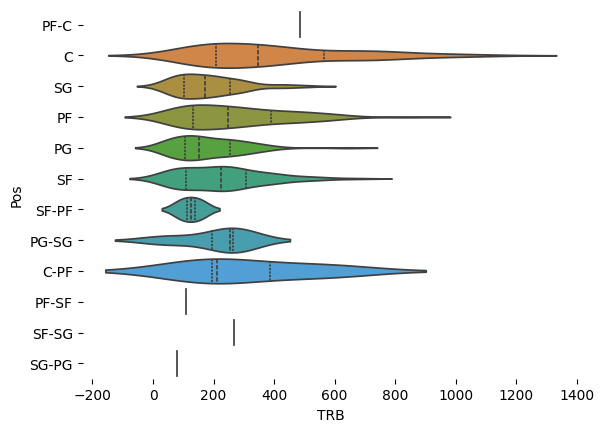

In [7]:
sns.violinplot(bb_data, x='TRB', y='Pos', inner='quart', hue='Pos')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: ylabel='TRB'>

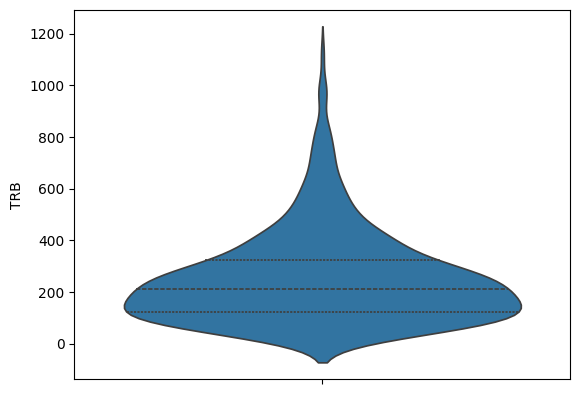

In [8]:
sns.violinplot(bb_data.TRB,inner='quart')

Based on my violin plot, I realized that I had a fairly large positive skew, however, I wanted to try it with just following along with the chemshift example to see if it would still work. It did run, but it gave me usually around 500-600 divergences and I knew that it wasn't the right model so I moved on to a different one.

In [9]:
with pm.Model(coords=bb_coords) as bb_h_model:
    # hyperpriors shared across all positions
    μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 5)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 10)

    # priors
    μ = pm.Normal('μ',
                  mu = μ_mu,
                  sigma = μ_sd,
                  dims = "Pos")

    σ = pm.HalfNormal('σ', sigma = 10,
                      dims = "Pos")

    #likelihood
    y = pm.Normal('y',
                  mu = μ[bb_idx],
                  sigma = σ[bb_idx],
                  observed = bb_data.TRB)

    idata_bb_h = pm.sample()


Output()

Output()

ERROR:pymc.stats.convergence:There were 316 divergences after tuning. Increase `target_accept` or reparameterize.


I decided to go through the motions of everything else, like the plot trace and posterior predictive check, just in case I ran out of time, before going through it again with hopefully a better model which would lead in a better end result.

array([[<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_mu'}>,
        <Axes: title={'center': 'μ_mu'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

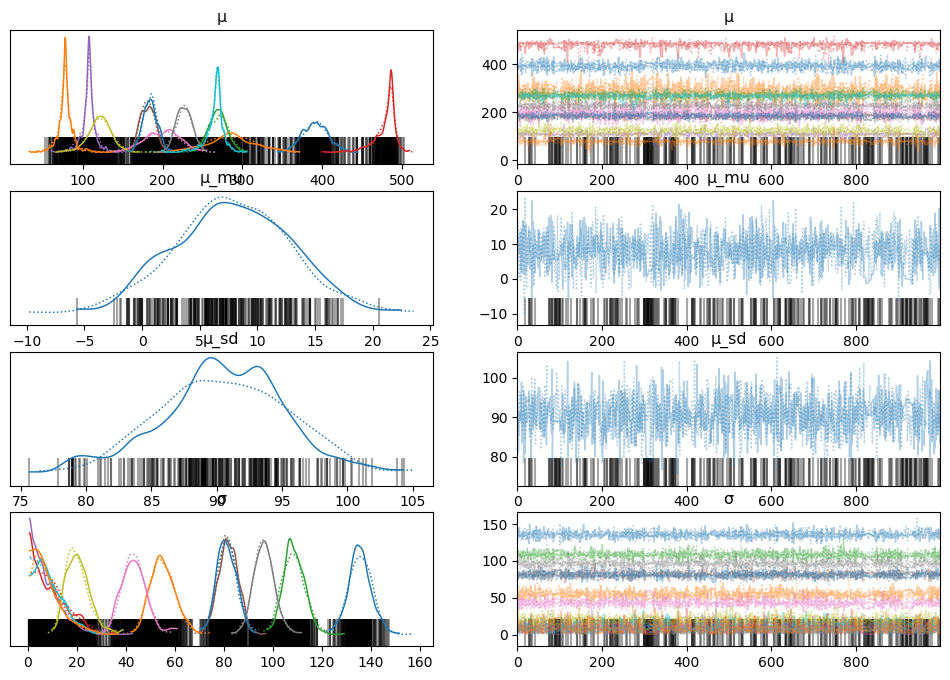

In [10]:
#visualization of the model
az.plot_trace(idata_bb_h)

In [11]:
#finding the rhat values
az.rhat(idata_bb_h)

<xarray.Dataset> Size: 448B
Dimensions:  (Pos: 12)
Coordinates:
  * Pos      (Pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ        (Pos) float64 96B 1.002 1.002 1.004 1.001 ... 0.9999 1.003 1.001
    μ_mu     float64 8B 1.001
    μ_sd     float64 8B 1.002
    σ        (Pos) float64 96B 1.002 1.0 1.004 1.009 ... 1.001 1.001 1.0 1.011

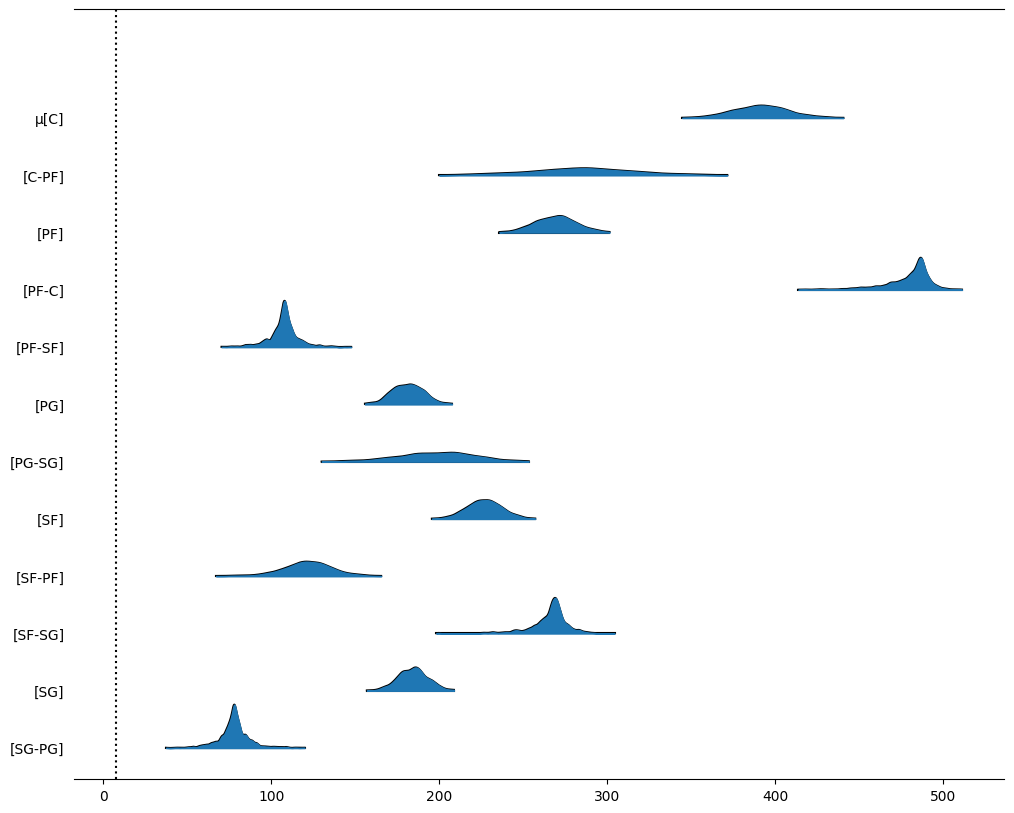

In [12]:
#plots a 99.7% HDI of the posterior for a player's total rebounds
axes = az.plot_forest([idata_bb_h], kind="ridgeplot",
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

#plots overall mean of the hierarchical model
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_bb_h.posterior['μ_mu'].mean(), *y_lims, color="k", ls=":");

With this ridgeplot, you can see how off my priors were from reality, how much the model I used for the likelihood, and the divergences threw off the data. The predicted mean is practicaly zero which doesn't make any sense and all of the models are super far away, have tons of skew, and are super jagged.

In [13]:
pm.sample_posterior_predictive(idata_bb_h, model=bb_h_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

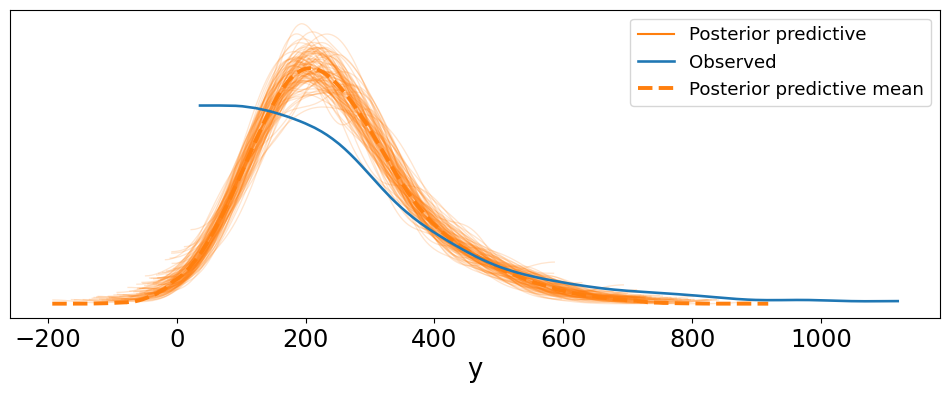

In [14]:
az.plot_ppc(idata_bb_h, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Since the likelihood that I used for this model was a normal distribution, so my posterior predictive will show a the shape of a normal distribution. Obviously, we know this isn't right but it gives us a good idea of what the mean should look like.  

In [15]:
with pm.Model(coords=bb_coords) as bb_snh_model:
    # hyperpriors shared across all positions
    μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 5)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 10)

    # priors
    μ = pm.Normal('μ',
                  mu = μ_mu,
                  sigma = μ_sd,
                  dims = "Pos")

    σ = pm.HalfNormal('σ', sigma = 10,
                      dims = "Pos")

    α = pm.Exponential('α', lam = 1/5, dims= "Pos")

    #likelihood
    y = pm.SkewNormal('y', mu = μ[bb_idx], sigma = σ[bb_idx], alpha = α[bb_idx], observed = bb_data.TRB)

    idata_bb_sh = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 259 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Trying it with a skew normal. This one also didn't end up working out but I still gave a try. I still had about 500-600 divergences for this model so I tried a gamma distribution which is probably what I should have done in the first place.

In [16]:
with pm.Model(coords=bb_coords) as bb_gh_model:
    # hyperpriors shared across all positions
    μ_mu = pm.Gamma('μ_mu', mu = 200, sigma = 50)
    μ_sd = pm.HalfNormal('μ_sd', sigma = 100)

    # priors
    μ = pm.Gamma('μ',
                  mu = μ_mu,
                  sigma = μ_sd,
                  dims = "Pos")

    σ = pm.HalfNormal('σ', sigma = 100,
                      dims = "Pos")

    #likelihood
    y = pm.Gamma('y', mu = μ[bb_idx], sigma = σ[bb_idx], observed = bb_data.TRB)

    idata_bb_gh = pm.sample()

Output()

Output()

ERROR:pymc.stats.convergence:There were 314 divergences after tuning. Increase `target_accept` or reparameterize.


After setting up the gamma distribution, I realized how bad my priors were which was probably part of what was giving me so many divergences. So looking at my previous attempts mean, I landed on a mu of 200 and a standard deviation of 50. The gamma distribution was also what fit the data the best so that also helped to decrease the number of divergences. While I didn't get rid of the divergences entirely, it lowered them significantly. There might be something I could do by querying my data to get it to not have any divergences, but having those divergences isn't life or death so I'm leaving them.

array([[<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_mu'}>,
        <Axes: title={'center': 'μ_mu'}>],
       [<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

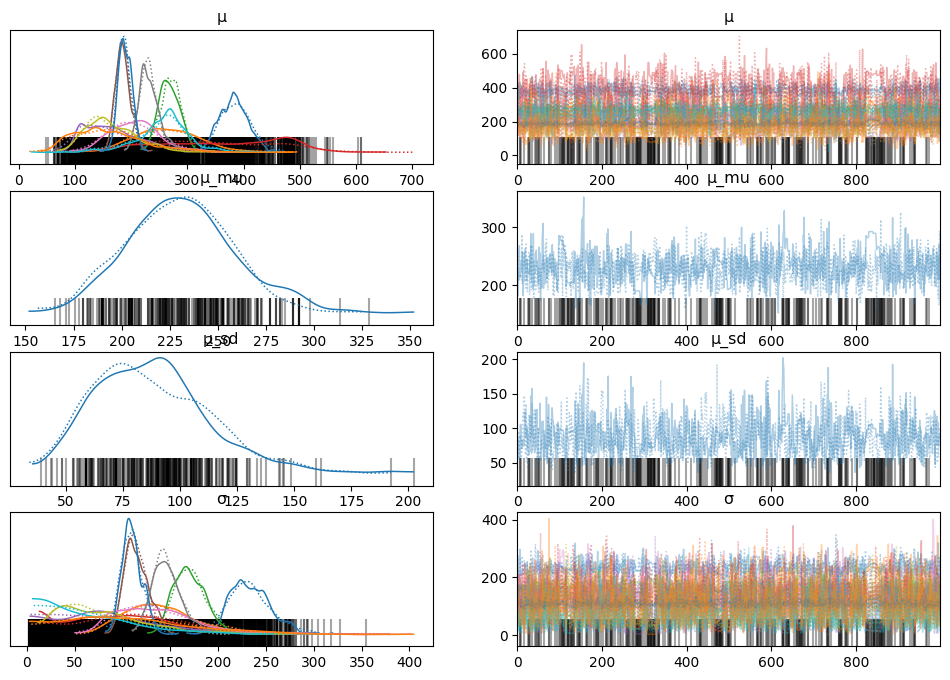

In [17]:
#visualization of the model
az.plot_trace(idata_bb_gh)

The plot trace shows the amount of divergences in the model. The black line in each model is the divergences for that model and the white space within the chain is when the model decided that trying again was useless. The spikyness of the model is ok if and only if it's uniform over the entire chain. Random spikes typically show deviance in the data. If I had limited the data to only include the main 5 positions vs also the subpositions there'd be less divergences because certain positions just get less opportunities to get rebounds.

In [18]:
#finding the rhat values
az.rhat(idata_bb_gh)

<xarray.Dataset> Size: 448B
Dimensions:  (Pos: 12)
Coordinates:
  * Pos      (Pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ        (Pos) float64 96B 1.005 1.002 1.003 1.006 ... 1.005 1.002 1.005
    μ_mu     float64 8B 1.004
    μ_sd     float64 8B 1.004
    σ        (Pos) float64 96B 1.002 1.005 1.001 1.013 ... 1.0 1.002 1.004 1.006

My rhat values aren't perfect (between 1 and 1.001), but they aren't that bad (above 1.1). The highest rhat value I have is 1.006 and the lowest is a perfect 1.001. So, even though I have a ton of divergences, the model is pretty certain in it's predictions of future rebounds.

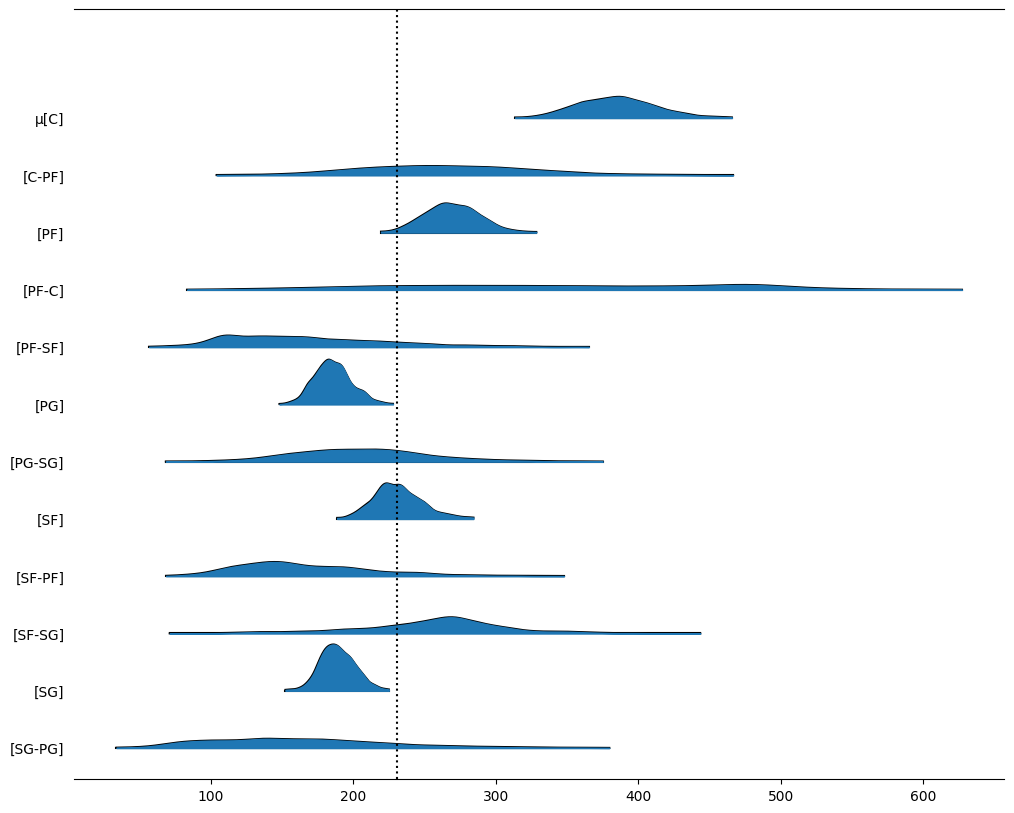

In [19]:
#plots a 99.7% HDI of the posterior for a player's total rebounds
axes = az.plot_forest([idata_bb_gh], kind="ridgeplot",
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

#plots overall mean of the hierarchical model
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_bb_gh.posterior['μ_mu'].mean(), *y_lims, color="k", ls=":");

By the ridge of each position, you can tell how close it is to the predicted mean of total rebounds which is represented by the dotted line around 230 ish. Most of the models touch that line at least to some extent and most of the ones that don't are pretty close to it. Removing those divergences would help to shrink all the models closer to the mean and would likely remove some of the skew we're seeing from models such as SF-SG. Based on the location of the ridge, we can determine that centers (C) have the highest rebound rate. There's a chance that the position corresponding to PF-C has a mean around the same number or higher, but because of how uncertain the model is in it's mean based on how spread out it is, we can't say with certainty that it has the highest model.

In [20]:
pm.sample_posterior_predictive(idata_bb_gh, model=bb_gh_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y'>

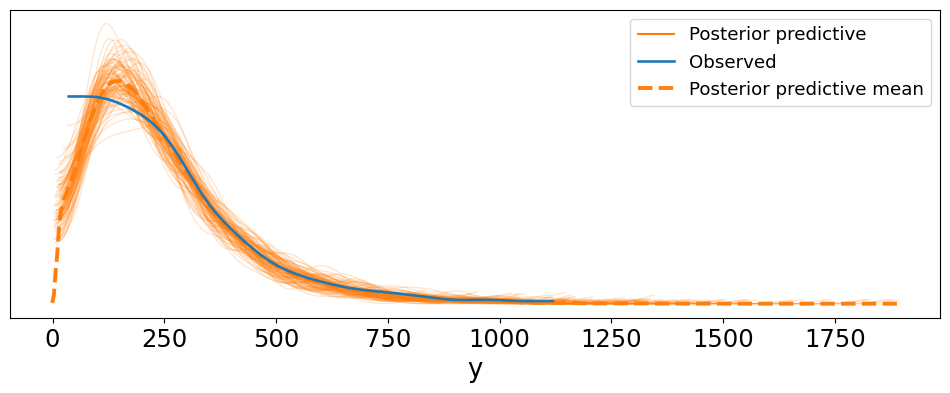

In [21]:
az.plot_ppc(idata_bb_gh, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

While my posterior predictive check shows that my model doesn't exactly match the data, it's close enough in the sense that the only part in which it fails is accuratly represent the height of the data before 250. However, we can see that the mean matches around what the ridgeplot thought and based on the data and a higher influx of total rebounds in the 200s, a mean around 230 isn't that far off.